In [35]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Yo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [36]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:

# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 


df = pd.concat([X, y], axis=1)


In [38]:

# metadata 
# print(statlog_german_credit_data.metadata) 
  

df

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [39]:
# Diccionario de mapeos en español
attribute_map = {
    "Attribute1": {
        "A11": "< 0 DM",
        "A12": "0 <= ... < 200 DM",
        "A13": ">= 200 DM / asignaciones salariales",
        "A14": "sin cuenta corriente",
    },
    "Attribute3": {
        "A30": "sin créditos / todos pagados",
        "A31": "todos los créditos en este banco pagados",
        "A32": "créditos existentes pagados debidamente",
        "A33": "retraso en el pago",
        "A34": "cuenta crítica / otros créditos",
    },
    "Attribute4": {
        "A40": "coche (nuevo)",
        "A41": "coche (usado)",
        "A42": "muebles/equipos",
        "A43": "radio/televisión",
        "A44": "electrodomésticos",
        "A45": "reparaciones",
        "A46": "educación",
        "A47": "vacaciones (?)",
        "A48": "reentrenamiento",
        "A49": "negocios",
        "A410": "otros",
    },
    "Attribute6": {
        "A61": "< 100 DM",
        "A62": "100 <= ... < 500 DM",
        "A63": "500 <= ... < 1000 DM",
        "A64": ">= 1000 DM",
        "A65": "desconocido / sin ahorros",
    },
    "Attribute7": {
        "A71": "desempleado",
        "A72": "< 1 año",
        "A73": "1 <= ... < 4 años",
        "A74": "4 <= ... < 7 años",
        "A75": ">= 7 años",
    },
    "Attribute9": {
        "A91": "hombre: divorciado/separado",
        "A92": "mujer: divorciada/separada/casada",
        "A93": "hombre: soltero",
        "A94": "hombre: casado/viudo",
        "A95": "mujer: soltera",
    },
    "Attribute10": {
        "A101": "ninguno",
        "A102": "co-solicitante",
        "A103": "garante",
    },
    "Attribute12": {
        "A121": "bienes raíces",
        "A122": "sociedad de construcción / seguro",
        "A123": "coche u otro",
        "A124": "desconocido / sin propiedad",
    },
    "Attribute14": {
        "A141": "banco",
        "A142": "tiendas",
        "A143": "ninguno",
    },
    "Attribute15": {
        "A151": "alquiler",
        "A152": "propio",
        "A153": "gratis",
    },
    "Attribute17": {
        "A171": "desempleado / no calificado - no residente",
        "A172": "no calificado - residente",
        "A173": "empleado calificado / oficial",
        "A174": "gestión / autónomo / altamente calificado",
    },
    "Attribute19": {
        "A191": "sin teléfono",
        "A192": "sí, registrado a nombre",
    },
    "Attribute20": {
        "A201": "sí (trabajador extranjero)",
        "A202": "no (no trabajador extranjero)",
    },
}


for attr, mapping in attribute_map.items():
    df[attr] = df[attr].map(mapping)


In [46]:
df.rename(columns={
    'Attribute1': 'cuenta_corriente',
    'Attribute2': 'duracion_credito_meses',
    'Attribute3': 'historial_crediticio',
    'Attribute4': 'proposito_credito',
    'Attribute5': 'monto_credito',
    'Attribute6': 'cuenta_ahorros',
    'Attribute7': 'antiguedad_empleo',
    'Attribute8': 'tasa_cuota_ingreso',
    'Attribute9': 'estado_civil_genero',
    'Attribute10': 'otros_deudores',
    'Attribute11': 'residencia_actual_anios',
    'Attribute12': 'propiedad',
    'Attribute13': 'edad',
    'Attribute14': 'otros_planes_pago',
    'Attribute15': 'tipo_vivienda',
    'Attribute16': 'cantidad_creditos_existentes',
    'Attribute17': 'ocupacion',
    'Attribute18': 'personas_a_cargo',
    'Attribute19': 'tiene_telefono',
    'Attribute20': 'trabajador_extranjero',
    'class': 'clase_pred'
}, inplace=True)


In [47]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))



Summary Statistics:
            cuenta_corriente  duracion_credito_meses  \
count                   1000             1000.000000   
unique                     4                     NaN   
top     sin cuenta corriente                     NaN   
freq                     394                     NaN   
mean                     NaN               20.903000   
std                      NaN               12.058814   
min                      NaN                4.000000   
25%                      NaN               12.000000   
50%                      NaN               18.000000   
75%                      NaN               24.000000   
max                      NaN               72.000000   

                           historial_crediticio proposito_credito  \
count                                      1000              1000   
unique                                        5                10   
top     créditos existentes pagados debidamente  radio/televisión   
freq                          

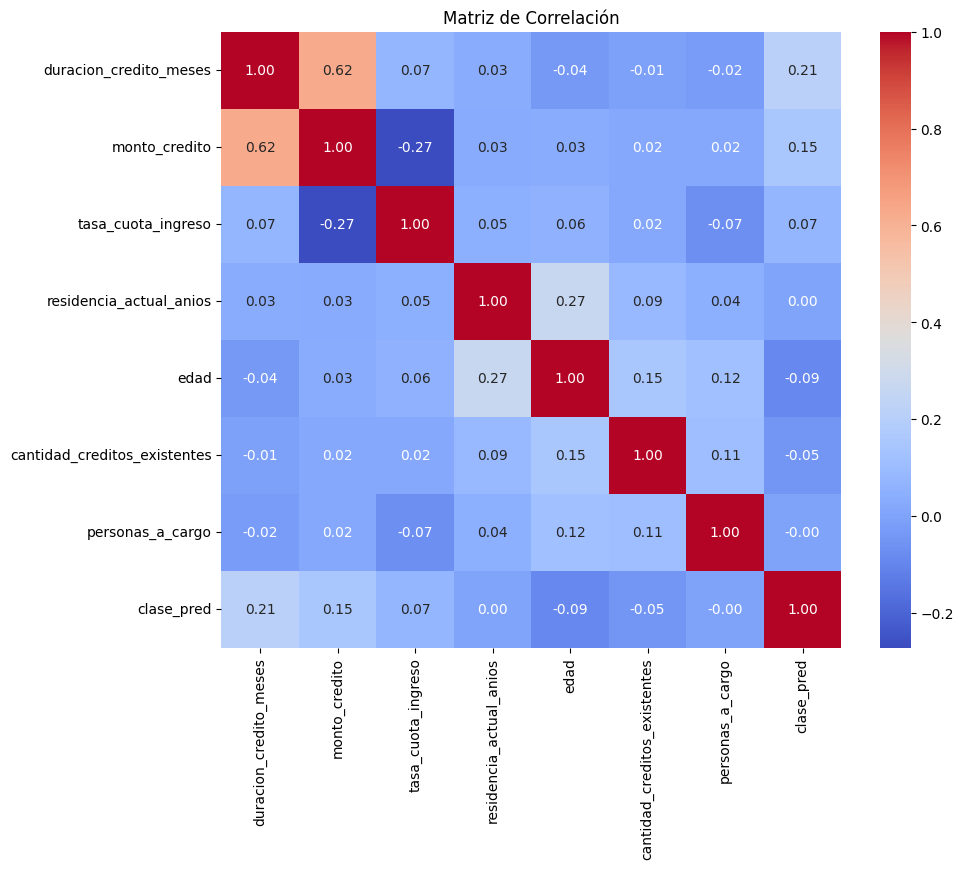

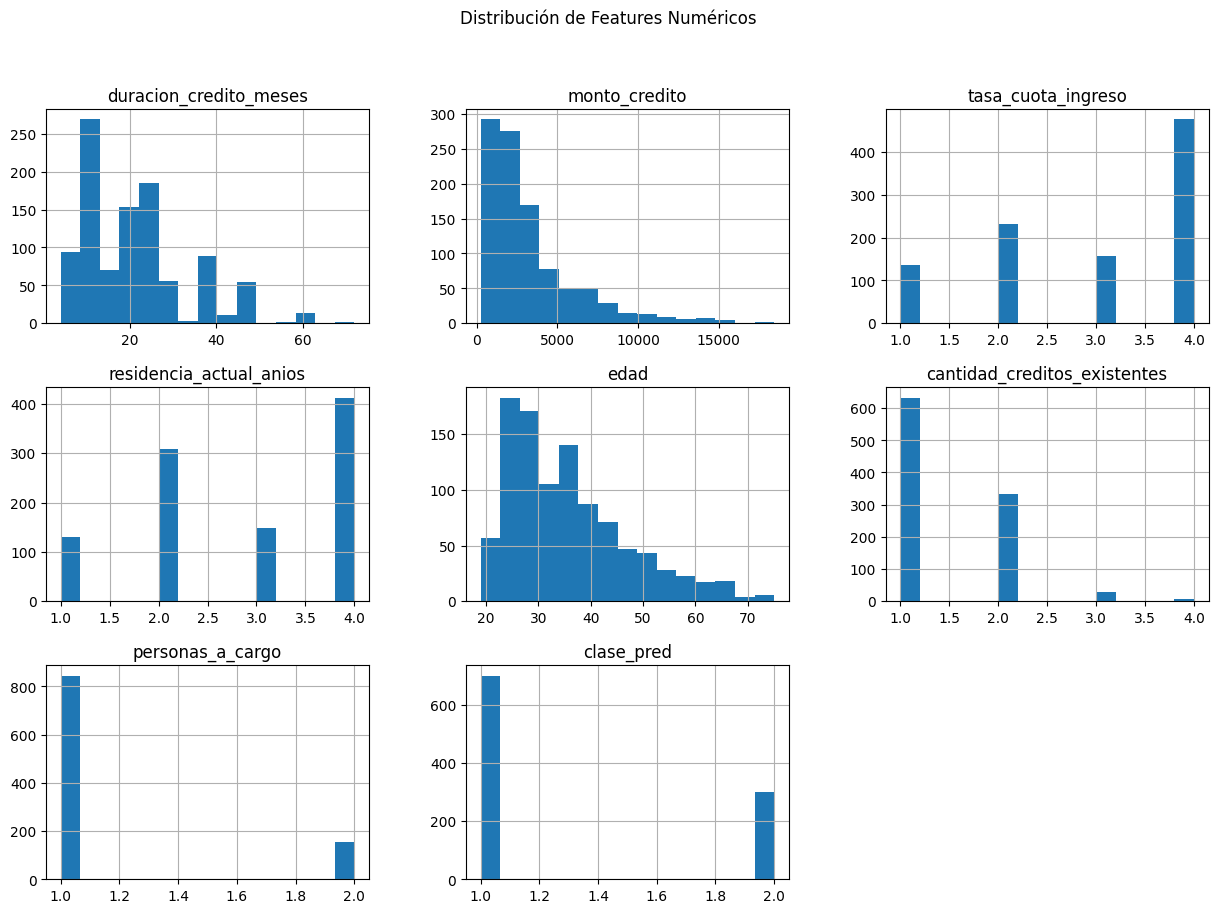

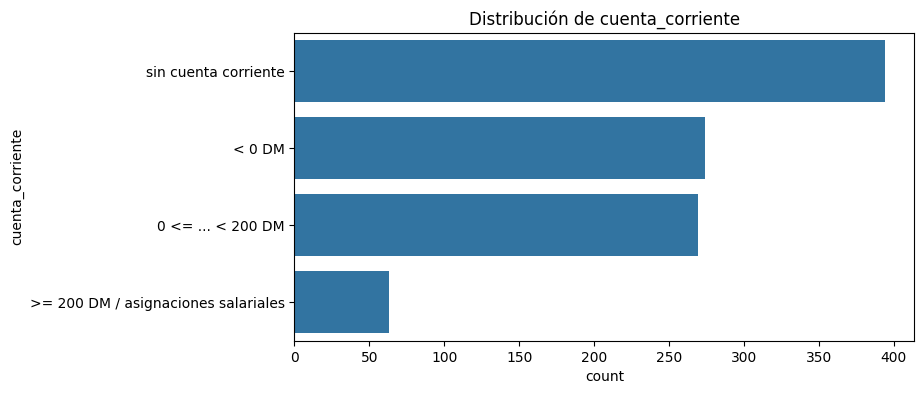

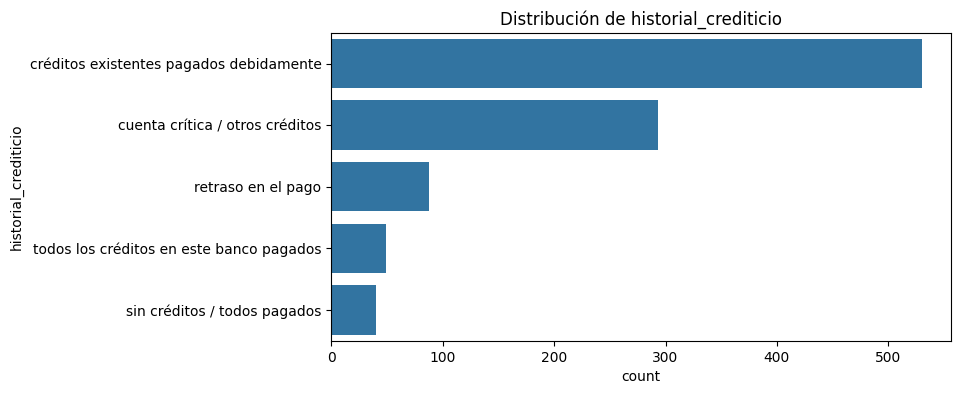

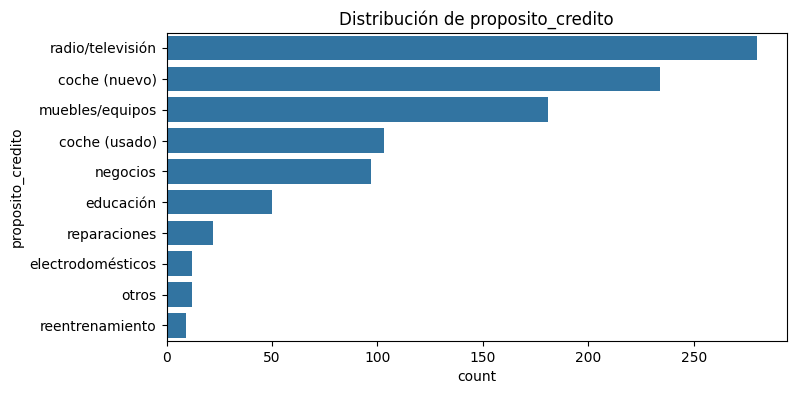

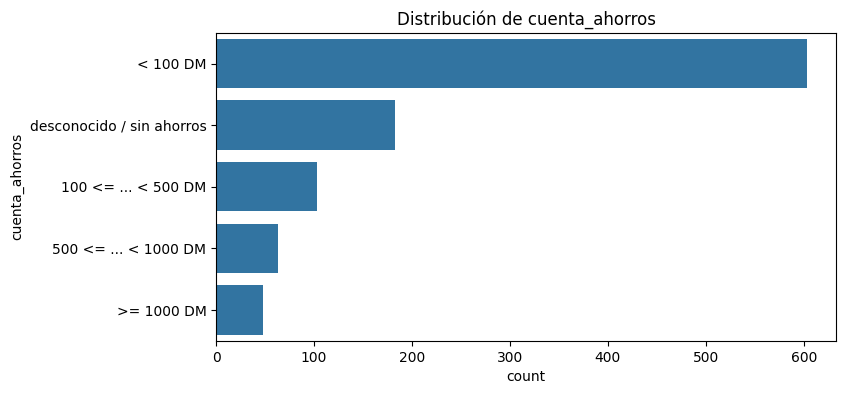

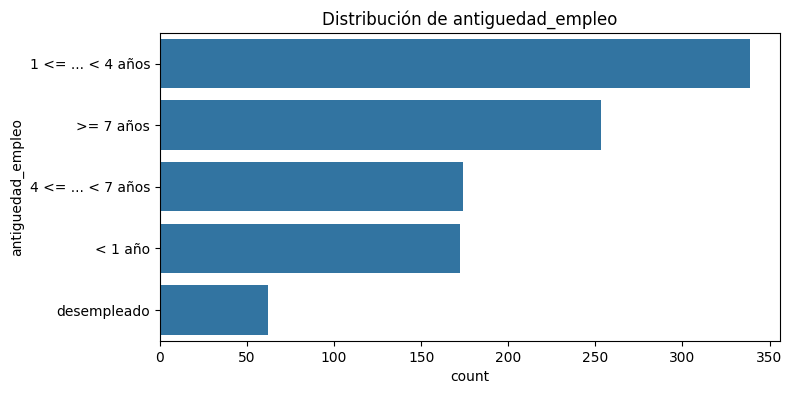

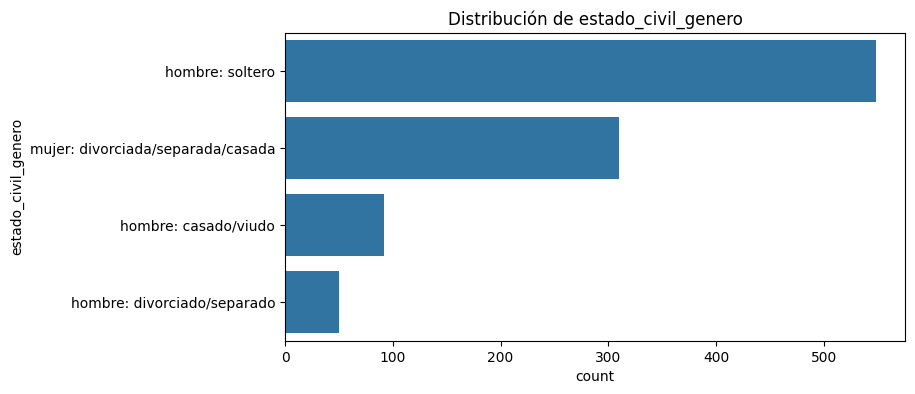

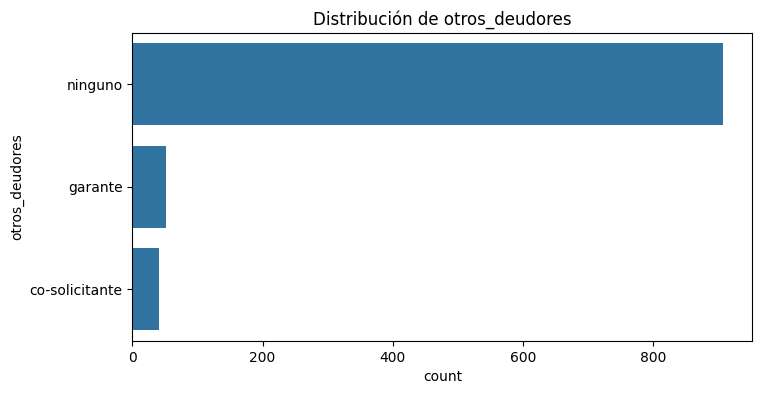

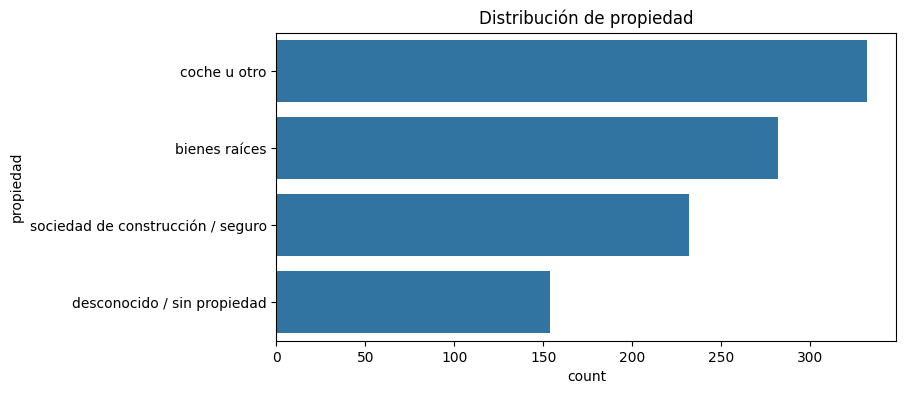

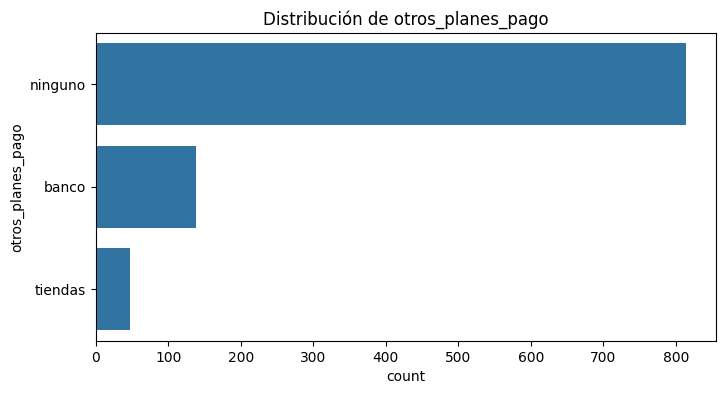

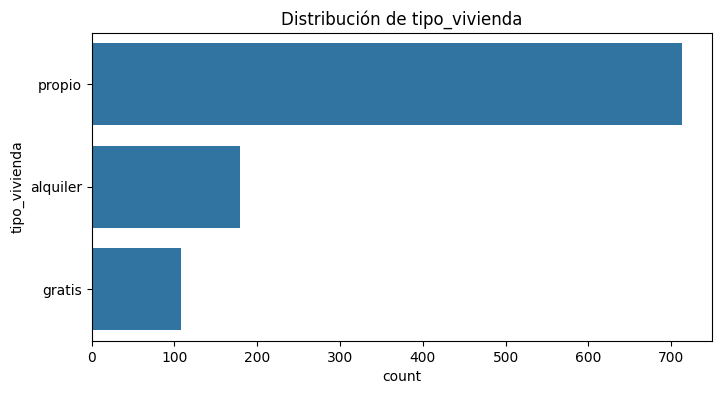

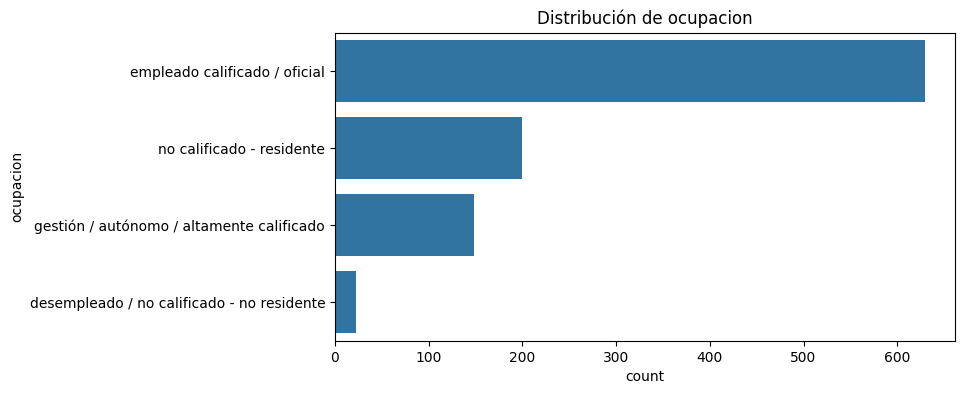

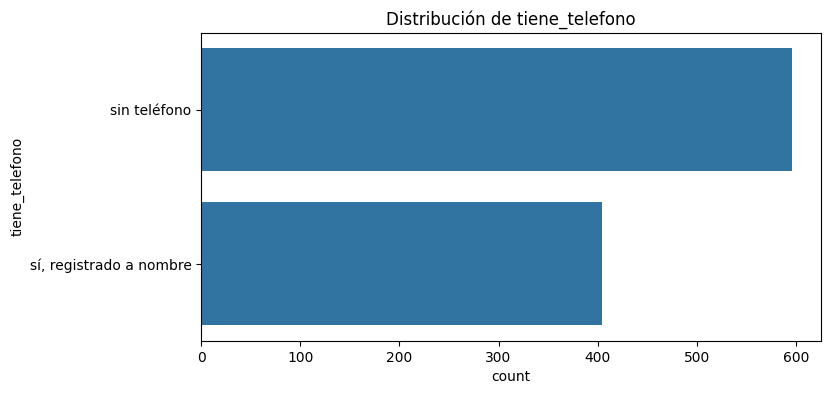

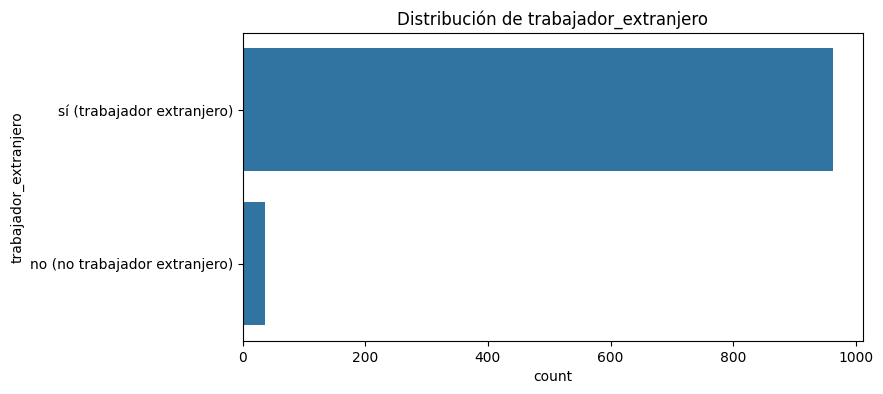

In [53]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribución de Features Numéricos')
plt.show()

# Count plots for categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.show()

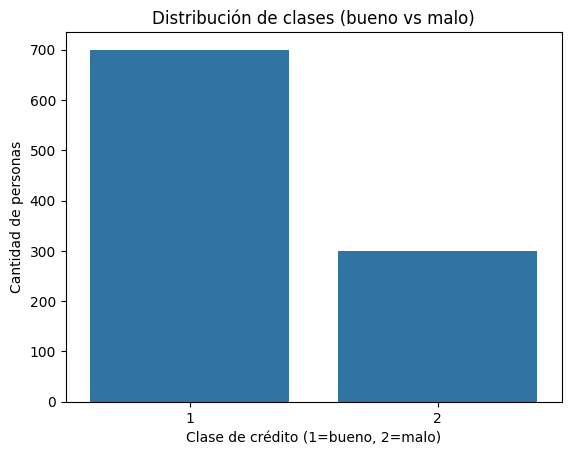

clase_pred
1    70.0
2    30.0
Name: proportion, dtype: float64


In [54]:
# Conteo de clases
sns.countplot(x='clase_pred', data=df)
plt.title("Distribución de clases (bueno vs malo)")
plt.xlabel("Clase de crédito (1=bueno, 2=malo)")
plt.ylabel("Cantidad de personas")
plt.show()

# Porcentaje por clase
print(df['clase_pred'].value_counts(normalize=True) * 100)


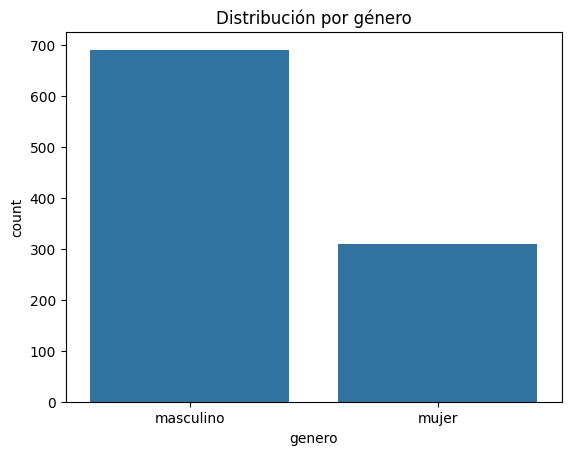

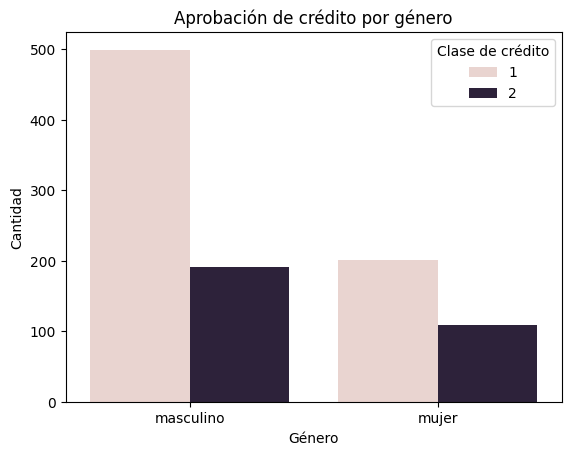

In [ ]:
# Extraer género
df['genero'] = df['estado_civil_genero'].apply(lambda x: 'mujer' if 'female' in x.lower() else 'masculino')

# Distribución de género
sns.countplot(x='genero', data=df)
plt.title("Distribución por género")
plt.show()

# Cruce género vs clase de crédito
sns.countplot(x='genero', hue='clase_pred', data=df)
plt.title("Aprobación de crédito por género")
plt.ylabel("Cantidad")
plt.xlabel("Género")
plt.legend(title="Clase de crédito")
plt.show()


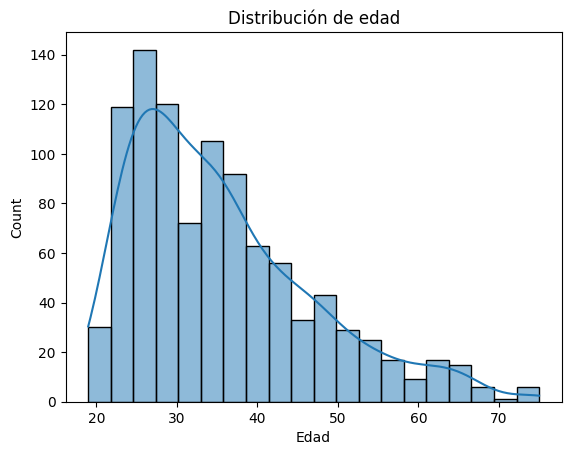


Edad mediana por clase de crédito:
clase_pred
1    34.0
2    31.0
Name: edad, dtype: float64

Edad promedio por clase de crédito:
clase_pred
1    36.224286
2    33.963333
Name: edad, dtype: float64


In [62]:
# Histograma de edad
sns.histplot(df['edad'], bins=20, kde=True)
plt.title("Distribución de edad")
plt.xlabel("Edad")
plt.show()

# Edad promedio por clase
print("\nEdad mediana por clase de crédito:")
print(df.groupby('clase_pred')['edad'].median())

print("\nEdad promedio por clase de crédito:")  
print(df.groupby('clase_pred')['edad'].mean())


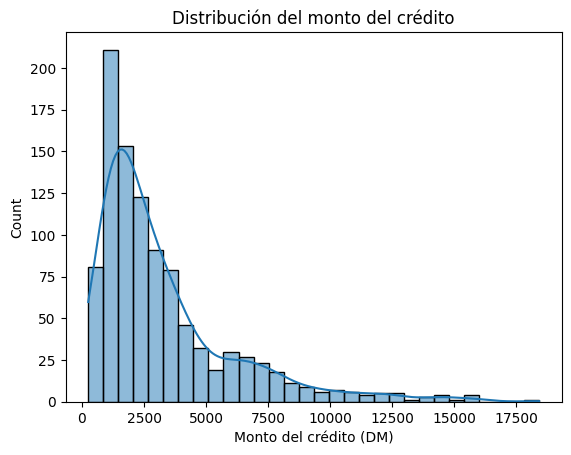

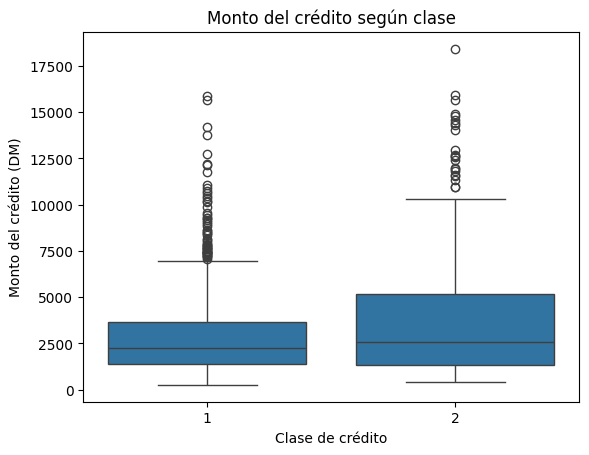

In [64]:
# Histograma
sns.histplot(df['monto_credito'], bins=30, kde=True)
plt.title("Distribución del monto del crédito")
plt.xlabel("Monto del crédito (DM)")
plt.show()

# Boxplot por clase
sns.boxplot(x='clase_pred', y='monto_credito', data=df)
plt.title("Monto del crédito según clase")
plt.xlabel("Clase de crédito")
plt.ylabel("Monto del crédito (DM)")
plt.show()


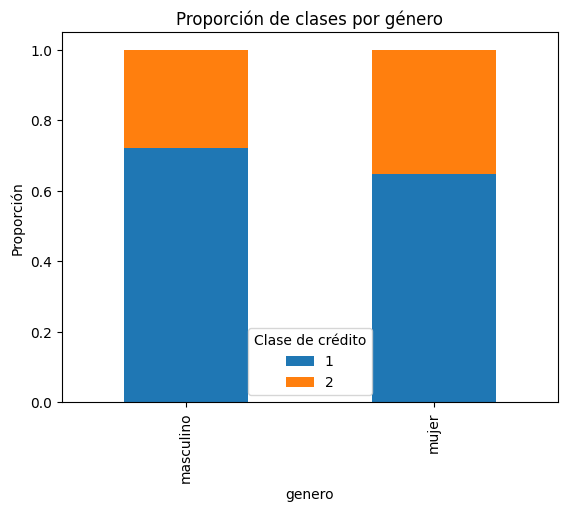

In [65]:
# Porcentaje de créditos buenos por género
df.groupby('genero')['clase_pred'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title("Proporción de clases por género")
plt.ylabel("Proporción")
plt.legend(title="Clase de crédito")
plt.show()


In [66]:
df.groupby('genero')['clase_pred'].value_counts(normalize=True).unstack()

clase_pred,1,2
genero,,
masculino,0.723188,0.276812
mujer,0.648387,0.351613
